# Monte Carlo Off policy

In [1]:
# import
import gym
import numpy as np

from envs import Maze
from utils import *

In [2]:
env = Maze()
env.reset()

(0, 0)

In [3]:
# create Q_table
state_size = list(env.observation_space.nvec)
action_size = env.action_space.n
# initialize q table with arbitrary value
q_table = np.full(shape=(state_size[0], state_size[1], action_size), fill_value=-100)
# set the goal value to 0
q_table[4, 4, :] = 0.


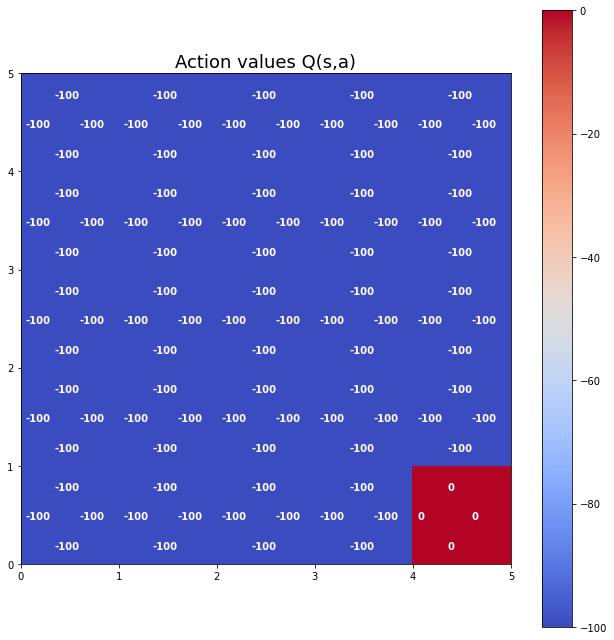

In [4]:
# plot q table 
plot_action_values(q_table)

In [5]:
# define target policy
def target_policy(state):
    av = q_table[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [6]:
# test target policy
action = target_policy((0, 0))
print(f'Agent take action {action} in state (0,0)')

Agent take action 2 in state (0,0)


In [7]:
# define exploratary policy
def explore_policy(state, epsilon=.2):
    # explore
    if np.random.random() < epsilon:
        return np.random.choice(4)
    
    # exploit
    else:
        av = q_table[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [8]:
# test explore and exploit policy
action = explore_policy((0, 0), epsilon=.5)
print(f'Agent take action {action} in state (0,0)')

Agent take action 2 in state (0,0)


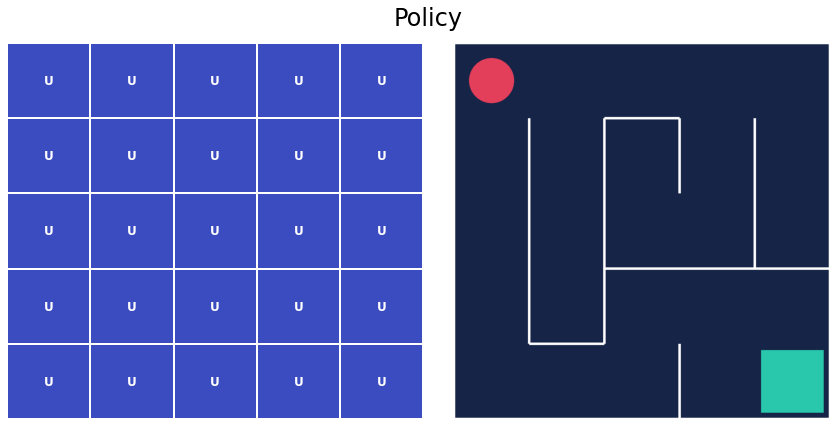

In [9]:
# plot policy
frame = env.render(mode='rgb_array')
plot_policy(q_table, frame)

**Monte Carlo Off Policy Algorithm**
\
**Input** $\gamma:$ discount rate
\
$\pi \leftarrow$ greedy policy w.r.t $Q(s, a)$
\
$b \leftarrow$ arbitrary policy with coverate of $\pi$
\
$C(s, a) \leftarrow 0$
\
Initialize $Q(s, a)$ arbitrarily
\
**for** episode $\in 1...N$ do
\
$\;\;\;\;\;$ Generate episode following $b : S_{0}, A_{0}, R_{0}, ......, S_{T-1}, A_{T-1}, R_{T}$
\
$\;\;\;\;\;$ $G \leftarrow 0$
\
$\;\;\;\;\;$ $W \leftarrow 1$
\
$\;\;\;\;\;$ **for** $t \in T - 1...0$ do
\
$\;\;\;\;\; \;\;\;\;\;$ $G \leftarrow R_{t+1} + \gamma G$
\
$\;\;\;\;\; \;\;\;\;\;$ $C(S_{t}, A_{t}) \leftarrow C(S_{t}, A_{t}) + W$
\
$\;\;\;\;\; \;\;\;\;\;$ $Q(S_{t}, A_{t}) \leftarrow Q(S_{t}, A_{t}) + \frac{W}{C(S_{t}, A_{t})}[G - Q(S_{t}, A_{t})]$
\
$\;\;\;\;\; \;\;\;\;\;$ **if** then $A_{t} \neq \pi(S_{t}$ 
\
$\;\;\;\;\; \;\;\;\;\; \;\;\;\;\;$ Break the loop, move to next episode
\
$\;\;\;\;\; \;\;\;\;\;$ $W \leftarrow W \frac{1}{b(A_{t}|S_{t})}$
\
$\;\;\;\;\;$ **end for**
\
**end for**
\
\
**Output:** Optimal $pi$ and action values $Q(s, a)$

In [35]:
# implement monte carlo algorithm "off policy"
def off_policy_control(q_table, target_policy, explore_policy, episodes, gamma=.9, epsilon=.4):
    c_table = np.zeros(shape=(state_size[0], state_size[1], action_size))
    
    for eps in range(1, episodes+1):
        G = 0
        W = 1
        state = env.reset()
        done = False
        state_transition = []

    
        while not done:
            action = explore_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            state_transition.append([next_state, action, reward])
            # update state
            state = next_state
                
        for state_t, action_t, reward_t in reversed(state_transition):

            G = reward_t + gamma * G
            c_table[state_t][action_t] += W
            q_table_old = q_table[state_t][action_t]
            q_table[state_t][action_t] += (W / c_table[state_t][action_t]) * (G - q_table_old)
            
            if action_t != target_policy(state_t):
                break
            
            W = W * 1. / (1 - epsilon + epsilon / action_size)
            print(W)

In [36]:
off_policy_control(q_table, target_policy, explore_policy, 20)

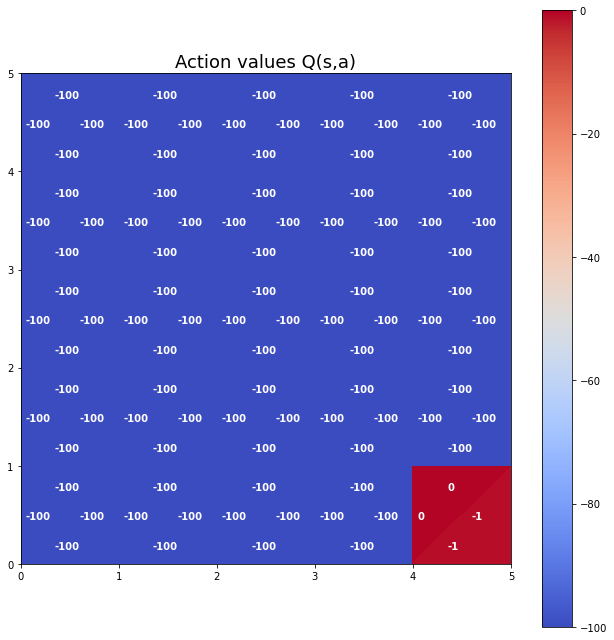

In [37]:
plot_action_values(q_table)